Date:2020/12/02

# 1. Import Data

In [56]:
import pandas as pd

# CSVファイルの読み込み
def load_data():
  return pd.read_csv("train_RandomForest.csv"), pd.read_csv("test_RandomForest.csv")

train_data, test_data = load_data()

## There are some factors that affects Death Event. This dataset contains person's information like age ,sex , blood pressure, smoke, diabetes,ejection fraction, creatinine phosphokinase, serum_creatinine, serum_sodium, time and we have to predict their DEATH EVENT.
* The column named “DEATH_EVENT” is the target variable that we want to predict using our model. “0” means “alive” and “1” means “death”.
* The following cell shows the descrition of the data

In [57]:
display(train_data.head())
display(train_data.info())
display(train_data.isna().sum())
display(test_data.describe())


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,40.0,1,101,0,40,0,226000.0,0.8,141,0,0,187,0
1,59.0,0,66,1,20,0,70000.0,2.4,134,1,0,135,1
2,49.0,0,789,0,20,1,319000.0,1.1,136,1,1,55,1
3,48.0,1,582,1,55,0,87000.0,1.9,121,0,0,15,1
4,64.0,0,143,0,25,0,246000.0,2.4,135,1,0,214,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       149 non-null    float64
 1   anaemia                   149 non-null    int64  
 2   creatinine_phosphokinase  149 non-null    int64  
 3   diabetes                  149 non-null    int64  
 4   ejection_fraction         149 non-null    int64  
 5   high_blood_pressure       149 non-null    int64  
 6   platelets                 149 non-null    float64
 7   serum_creatinine          149 non-null    float64
 8   serum_sodium              149 non-null    int64  
 9   sex                       149 non-null    int64  
 10  smoking                   149 non-null    int64  
 11  time                      149 non-null    int64  
 12  DEATH_EVENT               149 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 15.3 KB


None

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,60.104447,0.466667,651.620000,0.446667,37.593333,0.306667,267782.148467,1.328267,137.006667,0.660000,0.320000,140.186667,0.300000
std,11.713529,0.500559,1138.498857,0.498813,10.852332,0.462655,102896.286550,0.734670,3.943386,0.475296,0.468039,82.254262,0.459793
min,40.000000,0.000000,47.000000,0.000000,20.000000,0.000000,25100.000000,0.500000,126.000000,0.000000,0.000000,6.000000,0.000000
25%,51.250000,0.000000,122.500000,0.000000,30.000000,0.000000,212750.000000,1.000000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,265.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,143.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,40.000000,1.000000,305750.000000,1.400000,140.000000,1.000000,1.000000,212.750000,1.000000
max,94.000000,1.000000,7861.000000,1.000000,60.000000,1.000000,742000.000000,6.100000,145.000000,1.000000,1.000000,285.000000,1.000000


In [58]:
X_train = train_data.drop('DEATH_EVENT', axis=1)  
X_test  = test_data.drop('DEATH_EVENT', axis=1)  
y_train = train_data['DEATH_EVENT'] 
y_test  = test_data['DEATH_EVENT'] 

# 2. Scale Data


---
* Before modeling, we need to “center” and “standardize” our data by scaling. We scale to control for the fact that different variables are measured on different scales. We scale so that each predictor can have a “fair fight” against each other in deciding importance.



In [59]:
import numpy as np
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

# 3. Fit To “Baseline” Random Forest Model

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

1.0

---
* the following cell shows which features are most important to the Random Forest model to predict heart failure

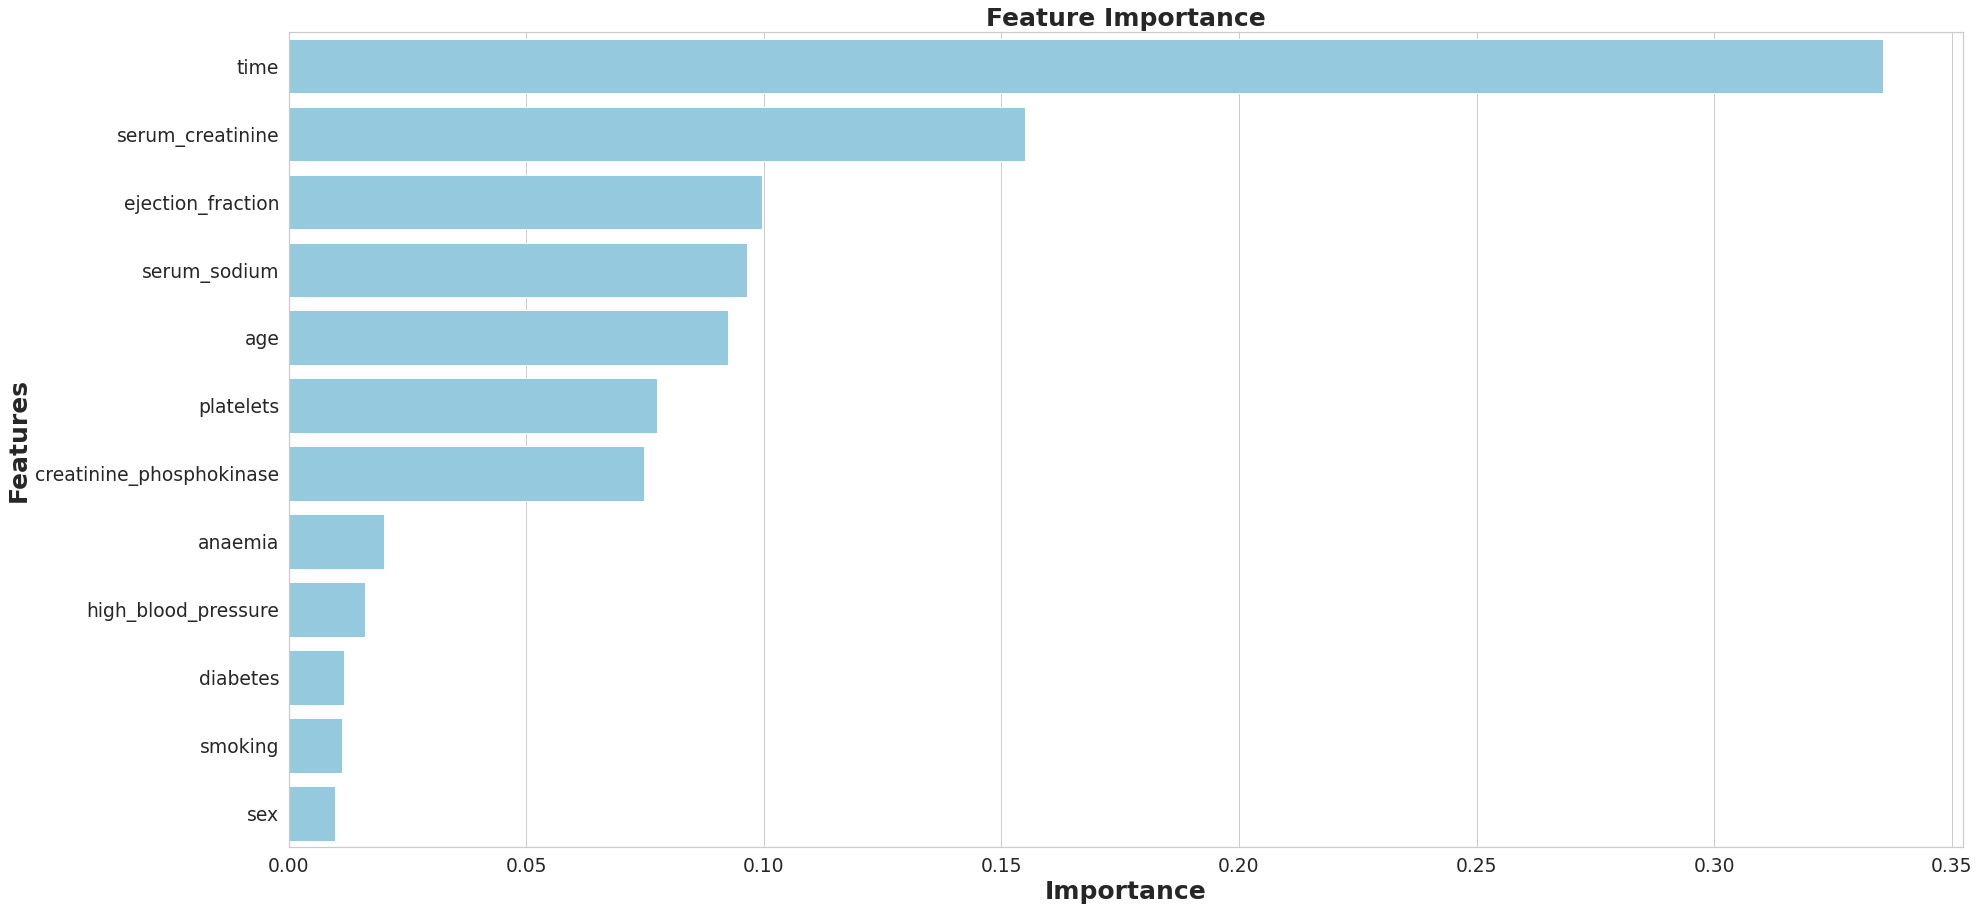

None

,Features,Gini-Importance
0,time,0.335586
1,serum_creatinine,0.154998
2,ejection_fraction,0.099565
3,serum_sodium,0.096418
4,age,0.092515
5,platelets,0.077530
6,creatinine_phosphokinase,0.074696
7,anaemia,0.020016
8,high_blood_pressure,0.016109
9,diabetes,0.011554


In [61]:
feats = {}
for feature, importance in zip(train_data.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

# 4. PCA (Principal Component Analysis)

---
* choosing 10 components out of 12 predicting variables

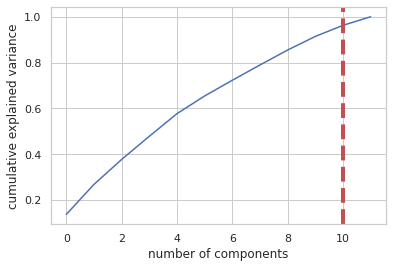

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.137334,0.137334
1,0.268353,0.131018
2,0.377241,0.108888
3,0.478260,0.101019
4,0.577018,0.098759
5,0.654257,0.077238
6,0.722790,0.068533
7,0.789596,0.066807
8,0.854813,0.065217
9,0.914103,0.059290


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=12)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(12))

In [63]:
pca = PCA(n_components=10)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

# 5. Fit To “Baseline” Random Forest Model After PCA

In [65]:
rfc_2 = RandomForestClassifier()
rfc_2.fit(X_train_scaled_pca, y_train)
display(rfc_2.score(X_train_scaled_pca, y_train))

1.0

# 6. Hyperparameter Tuning Round 1: RandomSearchCV

In [70]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc_2, 
                        param_dist, 
                        n_iter = 50, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train_scaled_pca, y_train)
rs.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.3min finished


{'bootstrap': True,
 'max_depth': 13,
 'max_features': 'log2',
 'min_samples_leaf': 7,
 'min_samples_split': 28,
 'n_estimators': 300}

In [71]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,300,28,7,log2,13,True,0.765170,1
1,700,12,2,sqrt,13,False,0.758776,2
2,600,23,2,sqrt,15,False,0.758639,3
3,300,39,2,sqrt,3,True,0.758639,3
4,400,23,2,sqrt,14,False,0.758639,3
5,600,50,2,sqrt,7,False,0.745306,6
6,500,39,18,sqrt,11,False,0.731837,7
7,400,34,7,log2,2,True,0.731837,7
8,400,23,12,sqrt,11,True,0.731701,9
9,1000,44,2,sqrt,9,True,0.731565,10


# 7. Hyperparameter Tuning Round 2: GridSearchCV

In [72]:
from sklearn.model_selection import GridSearchCV
"""
{'bootstrap': True,
 'max_depth': 13,
 'max_features': 'log2',
 'min_samples_leaf': 7,
 'min_samples_split': 28,
 'n_estimators': 300}
"""

n_estimators = [300,600,700]
max_features = ['log2']
max_depth = [3,7,13,14,15]
min_samples_split = [28,12,23,39]
min_samples_leaf = [2,18,7]
bootstrap = [True]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rfc_2, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train_scaled_pca, y_train)
rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  5.6min finished


{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 12,
 'n_estimators': 600}

# 8. Evaluate Performance Of Models On Test Data

In [73]:
y_pred = rfc.predict(X_test_scaled)
y_pred_pca = rfc_2.predict(X_test_scaled_pca)
y_pred_gs = gs.best_estimator_.predict(X_test_scaled_pca)

In [75]:
from sklearn.metrics import confusion_matrix
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
conf_matrix_baseline_pca = pd.DataFrame(confusion_matrix(y_test, y_pred_pca), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
conf_matrix_tuned_pca = pd.DataFrame(confusion_matrix(y_test, y_pred_gs), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)
display('Baseline Random Forest recall score', recall_score(y_test, y_pred))
display(conf_matrix_baseline_pca)
display('Baseline Random Forest With PCA recall score', recall_score(y_test, y_pred_pca))
display(conf_matrix_tuned_pca)
display('Hyperparameter Tuned Random Forest With PCA Reduced Dimensionality recall score', recall_score(y_test, y_pred_gs))

,predicted 0,predicted 1
actual 0,96,9
actual 1,11,34


'Baseline Random Forest recall score'

0.7555555555555555

,predicted 0,predicted 1
actual 0,95,10
actual 1,24,21


'Baseline Random Forest With PCA recall score'

0.4666666666666667

,predicted 0,predicted 1
actual 0,95,10
actual 1,23,22


'Hyperparameter Tuned Random Forest With PCA Reduced Dimensionality recall score'

0.4888888888888889